<a href="https://colab.research.google.com/github/akgulhandan/MscThesis/blob/main/Code_Cancidate284042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Candidate No: 284042**

> Machine Learning Resit Assignment





**Reading the Data and Importing Libraries**

I use Google Colab, so I put the data in my drive, I download the data from my drive to colab to use.

In [ ]:
## Get the dataset into the colab folder

!gdown 1Q8GpGUcKDyFO7_1A5KD8v5x3yKgxzOD6  #Met dataset - 2015-to-2022_12months.csv
!gdown 1s6RSjgPWk-AjVDtCCURkx4svznkBFMVo  #METADATA.xlsx

Downloading...
From: https://drive.google.com/uc?id=1Q8GpGUcKDyFO7_1A5KD8v5x3yKgxzOD6
To: /content/Met dataset - 2015-to-2022_12months.csv
100% 19.9M/19.9M [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s6RSjgPWk-AjVDtCCURkx4svznkBFMVo
To: /content/METADATA.xlsx
100% 20.0k/20.0k [00:00<00:00, 30.4MB/s]


In [ ]:
# Load the dataset to inspect its structure and understand the available features
import pandas as pd

# Loading the dataset
data = pd.read_csv("Met dataset - 2015-to-2022_12months.csv")

# Display the first few rows of the dataset and the data types of the columns
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33235 entries, 0 to 33234
Columns: 111 entries, x_coord to rainfall_12
dtypes: float64(108), int64(3)
memory usage: 28.1 MB


(   x_coord  y_coord  year  groundfrost_1  groundfrost_2  groundfrost_3  \
 0        1        1     1            NaN            NaN            NaN   
 1        1        1     1            NaN            NaN            NaN   
 2        1        1     1            NaN            NaN            NaN   
 3        1        1     1            NaN            NaN            NaN   
 4        1        1     1            NaN            NaN            NaN   
 
    groundfrost_4  groundfrost_5  groundfrost_6  groundfrost_7  ...  \
 0            NaN            NaN            NaN            NaN  ...   
 1            NaN            NaN            NaN            NaN  ...   
 2            NaN            NaN            NaN            NaN  ...   
 3            NaN            NaN            NaN            NaN  ...   
 4            NaN            NaN            NaN            NaN  ...   
 
    rainfall_3  rainfall_4  rainfall_5  rainfall_6  rainfall_7  rainfall_8  \
 0         NaN         NaN         NaN    

**Cleaning the Data**

In [ ]:
#Check the null or NaN values :
data.isna().sum()

# apart from x_coord, y_coord and year , there are 26605 null values in rest of each column

,0
x_coord,0
y_coord,0
year,0
groundfrost_1,26605
groundfrost_2,26605
...,...
rainfall_8,26605
rainfall_9,26605
rainfall_10,26605
rainfall_11,26605


In [ ]:
# Cleaning the data

# Drop null or NaN values
cleaned_data = data.dropna() ## 6630 entries left to work on

# Display the cleaned dataset
cleaned_data.info(), cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6630 entries, 58 to 33212
Columns: 111 entries, x_coord to rainfall_12
dtypes: float64(108), int64(3)
memory usage: 5.7 MB


(None,
     x_coord  y_coord  year  groundfrost_1  groundfrost_2  groundfrost_3  \
 58        4        4     1      12.937533      13.568946      14.002924   
 59        4        4     1      14.848941      16.546361      16.412982   
 60        4        4     1      16.143669      18.954618      16.558735   
 61        4        4     1      17.125375      19.603409      14.970040   
 62        4        4     1      13.800115      17.221303      13.203586   
 
     groundfrost_4  groundfrost_5  groundfrost_6  groundfrost_7  ...  \
 58       6.514516       1.594163       0.450717       0.104014  ...   
 59       8.735280       2.297967       0.183331       0.058646  ...   
 60      11.486554       2.132211       0.187823       0.028355  ...   
 61      11.154617       3.935746       1.176994       0.305995  ...   
 62       9.872522       3.147038       0.501383       0.091458  ...   
 
     rainfall_3  rainfall_4  rainfall_5  rainfall_6  rainfall_7  rainfall_8  \
 58   66.198718   31.3

In [ ]:
cleaned_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6630 entries, 58 to 33212
Data columns (total 111 columns):
 #    Column          Dtype  
---   ------          -----  
 0    x_coord         int64  
 1    y_coord         int64  
 2    year            int64  
 3    groundfrost_1   float64
 4    groundfrost_2   float64
 5    groundfrost_3   float64
 6    groundfrost_4   float64
 7    groundfrost_5   float64
 8    groundfrost_6   float64
 9    groundfrost_7   float64
 10   groundfrost_8   float64
 11   groundfrost_9   float64
 12   groundfrost_10  float64
 13   groundfrost_11  float64
 14   groundfrost_12  float64
 15   hurs_1          float64
 16   hurs_2          float64
 17   hurs_3          float64
 18   hurs_4          float64
 19   hurs_5          float64
 20   hurs_6          float64
 21   hurs_7          float64
 22   hurs_8          float64
 23   hurs_9          float64
 24   hurs_10         float64
 25   hurs_11         float64
 26   hurs_12         float64
 27   psl_1           flo

In [ ]:
# Checking for remaining missing values in the dataset
missing_values_count = cleaned_data.isna().sum()

# Getting a summary description of the dataset to understand the distributions
data_summary = cleaned_data.describe()


In [ ]:
# Display the results of the missing values count and the data summary
missing_values_count, data_summary

(x_coord          0
 y_coord          0
 year             0
 groundfrost_1    0
 groundfrost_2    0
                 ..
 rainfall_8       0
 rainfall_9       0
 rainfall_10      0
 rainfall_11      0
 rainfall_12      0
 Length: 111, dtype: int64,
            x_coord      y_coord         year  groundfrost_1  groundfrost_2  \
 count  6630.000000  6630.000000  6630.000000    6630.000000    6630.000000   
 mean      9.923077     9.923077     4.047059       7.967022       7.896864   
 std       4.245285     4.245285     2.034597       6.876222       6.811918   
 min       4.000000     4.000000     1.000000       0.008231       0.008231   
 25%       6.000000     6.000000     2.000000       0.946713       0.946713   
 50%       9.500000     9.500000     4.000000       7.034082       7.007468   
 75%      13.000000    13.000000     6.000000      13.748285      13.558181   
 max      22.000000    22.000000     8.000000      28.015332      28.015332   
 
        groundfrost_3  groundfrost_4  g

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6630 entries, 58 to 33212
Columns: 111 entries, x_coord to rainfall_12
dtypes: float64(108), int64(3)
memory usage: 5.7 MB


**Selecting feature columns and Creating sequence for months**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify features (all columns except the last month's `hurs`)
features = cleaned_data.drop([col for col in cleaned_data.columns if 'hurs_12' in col], axis=1)

# Identify the target (the `hurs_12` column)
target = cleaned_data['hurs_12']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
normalized_features = scaler.fit_transform(features)

# Convert normalized features back to a DataFrame for easier manipulation
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

# Add the target column back to the normalized features
normalized_data = normalized_features_df.copy()
normalized_data['target'] = target.reset_index(drop=True)

# Display the first few rows of the normalized data to ensure it's correctly processed
normalized_data_head = normalized_data.head()
normalized_data_head

,x_coord,y_coord,year,groundfrost_1,groundfrost_2,groundfrost_3,groundfrost_4,groundfrost_5,groundfrost_6,groundfrost_7,...,rainfall_4,rainfall_5,rainfall_6,rainfall_7,rainfall_8,rainfall_9,rainfall_10,rainfall_11,rainfall_12,target
0,-1.395318,-1.395318,-1.497735,0.722909,0.832733,0.900505,-0.195748,-0.903380,-1.062283,-1.106388,...,-0.952562,-0.006283,-0.419954,0.163432,0.987576,-0.143802,-0.068378,1.070359,1.120502,90.683255
1,-1.395318,-1.395318,-1.497735,1.000904,1.269855,1.255090,0.133095,-0.799181,-1.101710,-1.113057,...,-1.051070,-0.054849,-0.598927,0.155155,0.834569,-0.255603,-0.061531,0.911269,1.410653,89.832207
2,-1.395318,-1.395318,-1.497735,1.189209,1.623418,1.276534,0.540494,-0.823721,-1.101047,-1.117509,...,-1.096010,-0.316150,-0.960803,-0.179763,0.803736,-0.538928,-0.217730,-0.026946,0.252308,88.550074
3,-1.395318,-1.395318,-1.497735,1.331988,1.718668,1.042794,0.491342,-0.556706,-0.955190,-1.076697,...,-1.053195,-0.363480,-0.956681,-0.481577,0.686763,-0.415011,-0.279998,-0.032110,0.062582,86.504126
4,-1.395318,-1.395318,-1.497735,0.848363,1.368945,0.782901,0.301494,-0.673475,-1.054812,-1.108233,...,-1.075165,-0.520888,-0.903484,-0.606413,0.642296,-0.399747,-0.429928,-0.053323,-0.022116,85.654894


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Dive the normalized data to use PCa on features.
X = normalized_data.drop(columns=['target']) ## we don't need target value in pca
y = normalized_data['target']

# Apply PCA to the normalized data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)

# Check the number of components selected
n_components = X_pca.shape[1]
print(f"Number of components selected with PCA: {n_components}")




Number of components selected with PCA: 45


**Create Train and Test Samples**

In [ ]:
# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
y_test = y_test.reset_index(drop=True)  # Reset index to align with output of predictions later


# Check the shapes of the resulting datasets
X_train_shape = X_train_pca.shape
X_test_shape = X_test_pca.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape

((5304, 45), (1326, 45), (5304,), (1326,))

**Movel Development with MLP**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the MLP model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, input_dim=45, activation='relu'))  # PCA gives us 45 features

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Third hidden layer
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display the model summary
model_summary = model.summary()

model_summary


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [ ]:
# Train the model with the training data
history = model.fit(X_train_pca, y_train,
                    validation_split=0.2,    # Reserve 20% of the training data for validation
                    epochs=50,               # Number of epochs to train
                    batch_size=32,           # Batch size for each gradient update
                    verbose=1)               # Verbosity mode


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4921.3037 - mean_absolute_error: 66.5208 - val_loss: 74.3982 - val_mean_absolute_error: 6.8769
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.3194 - mean_absolute_error: 5.9577 - val_loss: 34.4202 - val_mean_absolute_error: 4.4129
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.0725 - mean_absolute_error: 4.1905 - val_loss: 23.0150 - val_mean_absolute_error: 3.6275
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.8464 - mean_absolute_error: 3.4309 - val_loss: 17.2974 - val_mean_absolute_error: 3.1951
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.7290 - mean_absolute_error: 3.0067 - val_loss: 13.6830 - val_mean_absolute_error: 2.8261
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2324 - mean_absolute_error: 2.5638 - val_loss: 12.0806 - val_mean_absolute_error: 2.6674
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.8712 - mean_absolute_er

**Evaluating the Model**

**Mean Squared Error and Loss:**

In [ ]:
# Evaluate the model on the test data
# loss : mean squared error, mae : mean absolute error
test_loss, test_mae = model.evaluate(X_test_pca, y_test, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5199 - mean_absolute_error: 1.3677
Test Loss: 3.4514646530151367
Test MAE: 1.3721511363983154


**Plotting the Training history**

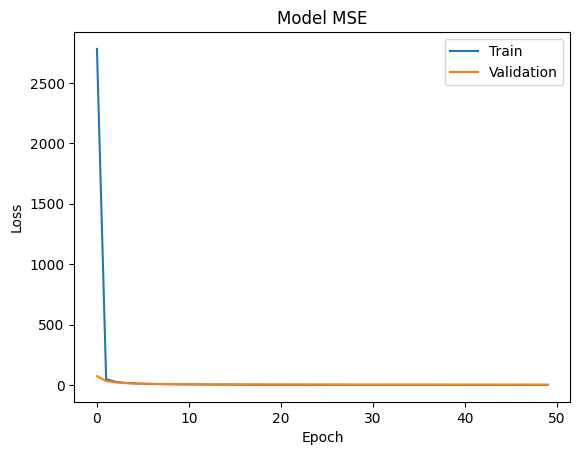

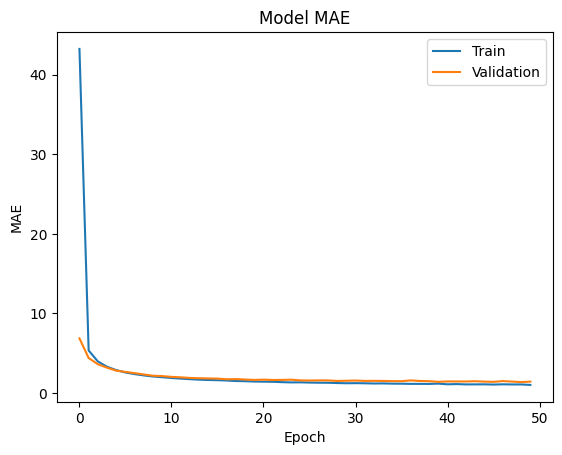

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


**Creating predictions:**

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test_pca)

# Display the first few predictions alongside the actual values for comparison
for i in range(10):
    print(f"Actual value: {y_test.iloc[i]}, Prediction: {y_pred[i][0]}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Actual value: 86.45111111, Prediction: 94.28528594970703
Actual value: 82.44815494, Prediction: 83.7211685180664
Actual value: 83.5068253, Prediction: 81.42867279052734
Actual value: 91.26388399, Prediction: 89.47543334960938
Actual value: 87.09246187, Prediction: 89.92375946044922
Actual value: 83.33644249, Prediction: 83.31360626220703
Actual value: 84.37316481, Prediction: 83.68989562988281
Actual value: 89.46165383, Prediction: 91.0702896118164
Actual value: 89.4912208, Prediction: 90.01325225830078
Actual value: 76.54846554, Prediction: 75.15100860595703


**Saving the output file:**

In [ ]:
##Saving predictions to csv file:

# Create ID for each data point
data_instance_id = range(1, len(y_pred) + 1)

# Create a DataFrame with the required columns
results = pd.DataFrame({
    'instance_id': data_instance_id,  # the instance ID
    'true_label': y_test.round(4),         # The true labels
    'prediction': y_pred.flatten().round(4)  # Flatten the predictions array
})

# Save the DataFrame to a CSV file
results.to_csv('model_predictions.csv', index=False)

print("Predictions have been saved to 'model_predictions.csv'.")


Predictions have been saved to 'model_predictions.csv'.


In [ ]:
results.head(10)

,instance_id,true_label,prediction
0,1,86.4511,94.285301
1,2,82.4482,83.721199
2,3,83.5068,81.428703
3,4,91.2639,89.475403
4,5,87.0925,89.923798
5,6,83.3364,83.313599
6,7,84.3732,83.689903
7,8,89.4617,91.070297
8,9,89.4912,90.013199
9,10,76.5485,75.151001
